In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Statistics

This notebook provides examples for extracting useful statistics from processed hdf5 data.

In [3]:
from e11 import H5Data
from e11.stats import statistics
from e11.tools import add_column_index
from e11.process import vrange

In [4]:
# read file
import os 
fil = os.path.join(os.getcwd(), 'example_data', 'array_data.h5')
h5 = H5Data(fil)

100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 663.01it/s]


In [5]:
h5.log

,ACQUIRE,DATETIME,END,ERROR,LOOP,OVERRIDE,START,VAR:PAUSE,ELAPSED
squid,,,,,,,,,
1,10.036975,2017-12-01 15:41:22,3.594988e+09,0,1,0,3.594988e+09,300,00:00:00
2,10.021719,2017-12-01 15:41:33,3.594988e+09,0,1,0,3.594988e+09,600,00:00:11
3,10.034403,2017-12-01 15:41:45,3.594988e+09,0,1,0,3.594988e+09,900,00:00:23
4,10.022052,2017-12-01 15:41:55,3.594988e+09,0,2,0,3.594988e+09,300,00:00:33
5,10.027435,2017-12-01 15:42:06,3.594988e+09,0,2,0,3.594988e+09,600,00:00:44
6,10.027131,2017-12-01 15:42:18,3.594988e+09,0,2,0,3.594988e+09,900,00:00:56


## Vrange

Here, we are applying the vrange function to measure the vertical range of array data.

In [6]:
rng = h5.apply(vrange, 'OSC_0', h5.squids)
rng.head()

100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 142.39sq/s]


vrange
squid measurement          
1     0            1.033028
      1            1.012191
      2            1.032403
      3            1.070328
      4            1.062143

In [7]:
rng.describe()

,vrange
count,151.000000
mean,1.039718
std,0.015097
min,0.997321
25%,1.031731
50%,1.041619
75%,1.050006
max,1.083854


##  Statistics

The `statistics()` function can be used to find the average vrange value per squid.

In [8]:
av = statistics(rng, mode='full')
av.head()

vrange                                                              \
       count       err       max      mean    median       min     range   
squid                                                                      
1         25  0.003350  1.070328  1.038482  1.039619  1.000539  0.069789   
2         25  0.002847  1.064080  1.039364  1.042150  1.002382  0.061698   
3         26  0.001758  1.061674  1.043457  1.043071  1.020032  0.041642   
4         25  0.002988  1.083854  1.044290  1.042212  1.020626  0.063229   
5         25  0.003784  1.063393  1.034683  1.033215  0.997321  0.066072   

                 
            std  
squid            
1      0.016752  
2      0.014236  
3      0.008966  
4      0.014941  
5      0.018921

In [9]:
# map measurements to var values
df = add_column_index(h5.var, 'VAR').join(av)
df.head()

VAR vrange                                                    \
      PAUSE  count       err       max      mean    median       min   
squid                                                                  
1       300     25  0.003350  1.070328  1.038482  1.039619  1.000539   
2       600     25  0.002847  1.064080  1.039364  1.042150  1.002382   
3       900     26  0.001758  1.061674  1.043457  1.043071  1.020032   
4       300     25  0.002988  1.083854  1.044290  1.042212  1.020626   
5       600     25  0.003784  1.063393  1.034683  1.033215  0.997321   

                           
          range       std  
squid                      
1      0.069789  0.016752  
2      0.061698  0.014236  
3      0.041642  0.008966  
4      0.063229  0.014941  
5      0.066072  0.018921

KeyError: ('vrange_0', 'mean')

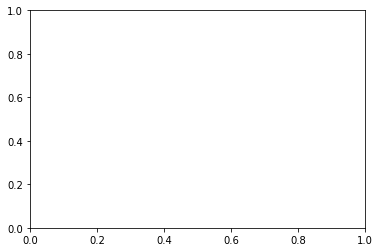

In [10]:
# plot
fig, ax = plt.subplots()

xvals = df[('VAR', 'PAUSE')]
yvals = df[('vrange_0', 'mean')]
yerr =  df[('vrange_0', 'err')]
ax.errorbar(xvals, yvals, yerr=yerr, marker='o')

#format
ax.set_xlabel('Pause (ms)')
ax.set_ylabel('signal (arb. units)')

#output
plt.show()

## Loops

It's not unusual for different squids to be run using the same experimental conditions (VARS), e.g., if looping an experiment script.

The plot above indicates that there were 2 loops recorded using the same values for VAR:PAUSE.  These can simply be grouped together to find the overall statistics for unique VAR values.

In [ ]:
# map measurements to var values
df2 = h5.var.join(rng)
df2.head()

In [ ]:
# then evaluate the statistics when grouped by var values
st = statistics(df2, groupby=h5.var.columns, mode='full')
st.head()

In [ ]:
# plot
fig, ax = plt.subplots()

xvals = st.index.get_level_values('PAUSE')
yvals = st[('vrange_0', 'mean')]
yerr =  st[('vrange_0', 'err')]
ax.errorbar(xvals, yvals, yerr=yerr, marker='o')

#format
ax.set_xlabel('pause (ms)')
ax.set_ylabel('signal (arb. units)')

#output
plt.show()